# Quixo Players - Results Collection and Analysis

The purpose of this notebook is:
1. To `test` the correctness of our code implementation for different classes and functions.
2. To `evaluate` the performance of our players against the baseline players and each other.
3. To `investigate` their resulting in-game strategies.
4. To `graphically display` the results of our experiments.

In [1]:
from game import Move, Player, Game
from quixo import Quixo
from symmetry import SymmetryGenerator
from main import RandomPlayer, MyPlayer
from reinforcement_learning import MonteCarloPlayer
from minimax import MinimaxPlayer
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

C:\Users\bea-c\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Quixo Game

### Example match
In this example, we'll show the phases of a game of Quixo between two random players. We're using our extended class `Quixo(Game)` which allows us to have more control over the visualization of each game state.

> 👁️‍🗨️ This is done in order to verify that the extensions that we have applied are working as expected, without altering the game logic.

In [3]:
g = Quixo()
player1 = RandomPlayer()
player2 = RandomPlayer()
winner = g.play(player1, player2, verbose=True, debug=True)
print(f"Winner: Player {winner}")


*****************
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 

Current player: ❌
Number of possible actions: 44
Possible actions:  [((0, 0), <Move.BOTTOM: 1>), ((0, 4), <Move.TOP: 0>), ((0, 0), <Move.RIGHT: 3>), ((4, 0), <Move.LEFT: 2>), ((1, 0), <Move.BOTTOM: 1>), ((1, 0), <Move.LEFT: 2>), ((1, 0), <Move.RIGHT: 3>), ((1, 4), <Move.TOP: 0>), ((1, 4), <Move.LEFT: 2>), ((1, 4), <Move.RIGHT: 3>), ((0, 1), <Move.RIGHT: 3>), ((0, 1), <Move.TOP: 0>), ((0, 1), <Move.BOTTOM: 1>), ((4, 1), <Move.LEFT: 2>), ((4, 1), <Move.TOP: 0>), ((4, 1), <Move.BOTTOM: 1>), ((2, 0), <Move.BOTTOM: 1>), ((2, 0), <Move.LEFT: 2>), ((2, 0), <Move.RIGHT: 3>), ((2, 4), <Move.TOP: 0>), ((2, 4), <Move.LEFT: 2>), ((2, 4), <Move.RIGHT: 3>), ((0, 2), <Move.RIGHT: 3>), ((0, 2), <Move.TOP: 0>), ((0, 2), <Move.BOTTOM: 1>), ((4, 2), <Move.LEFT: 2>), ((4, 2), <Move.TOP: 0>), ((4, 2), <Move.BOTTOM: 1>), ((3, 0), <Move.BOTTOM: 1>), ((3, 0), <Move.LEFT: 2>), ((3, 0), <Move.RIGHT: 3>), ((3, 4), <Move.TOP: 0>), ((3, 4),

### Utility functions

In [2]:
def collect_results(player1, player2, n_games=100):
    """
    Collects the results of playing n_games between player1 and player2.
    Returns a dictionary with the number of wins for each player.
    e.g. {'Player 0': 50, 'Player 1': 50}
    """
    
    # 1. Initialize the results
    results = defaultdict(int)
    results[0] = 0
    results[1] = 0

    # 2. Play the games
    for _ in tqdm(range(n_games)):
        g = Quixo()
        winner = g.play(player1, player2, verbose=False, debug=False)
        results[winner] += 1
        
    return results

In [3]:
def plot_results(results: dict, player1: str, player2: str):
    """
    Plots the results of playing n_games between player1 and player2.
    """
    # 1. Extract player numbers and wins
    players = list(results.keys())
    wins = list(results.values())

    # 2. Create a bar plot
    plt.figure(figsize=(6,5))
    plt.bar(players, wins, color=['red', 'black'])
    plt.xticks(players, [player1, player2])
    plt.ylabel('Number of Wins')
    plt.title('Game Results')
    plt.show()

## MiniMax Player

The MiniMax player is a player that uses the MiniMax algorithm to choose the best move. It is a recursive algorithm that explores the game tree until it reaches a terminal state. It then evaluates the utility of each terminal state and propagates the values back up the tree. 

> ⚠️ The algorithm assumes that the opponent will play optimally.

### Performance Evaluation

In this section, we show the results of 2000 games between a MiniMax player (with depth=2) and a random player:
- 1000 games where the MiniMax player starts
- 1000 games where the MiniMax moves second

100%|██████████| 1000/1000 [07:36<00:00,  2.19it/s]


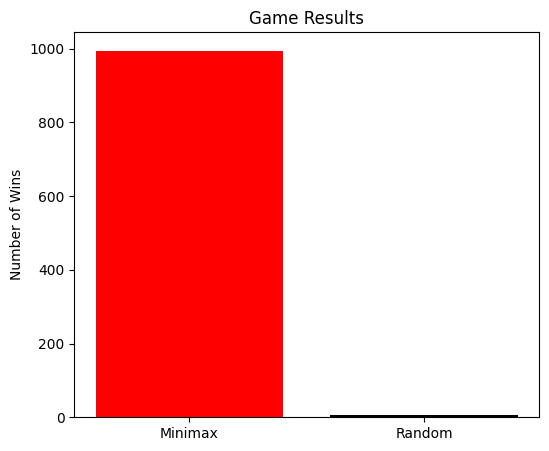

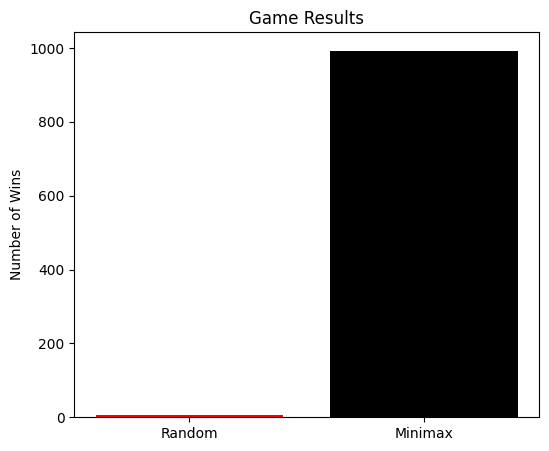

In [9]:
g = Quixo()
minimax_player = MinimaxPlayer(depth=2)
opponent = RandomPlayer()

# 1. Play 1000 games with Minimax moving first
res1 = collect_results(minimax_player, opponent, n_games=1000)

# 2. Play 1000 games with Minimax moving second
res2 = collect_results(opponent, minimax_player, n_games=1000)

# 3. Plot the results
plot_results(res1, 'Minimax', 'Random')
plot_results(res2, 'Random', 'Minimax')

In [13]:
print("❌ Results for Minimax moving first:")
print("Wins:", res1[0])
print("Losses:", res1[1])
print(f"Percentage of wins: {res1[0] / (res1[0] + res1[1]) * 100}%")

print("\n🔘 Results for Minimax moving second:")
print("Wins:", res2[1])
print("Losses:", res2[0])
print(f"Percentage of wins: {res2[1] / (res2[0] + res2[1]) * 100}%")

❌ Results for Minimax moving first:
Wins: 995
Losses: 5
Percentage of wins: 99.5%

🔘 Results for Minimax moving second:
Wins: 993
Losses: 7
Percentage of wins: 99.3%


### Strategy Analysis

In this section, we present an example of a full game between a MiniMax player and a random player. We want to show how the MiniMax player chooses its moves during the game, in order to spot any interesting patterns and weaknesses.

> ⚠️ Our hypothesis to explain the very few losses in the previous section is based on the fact that the Random player is not playing optimally. Therefore, it can potentially make unexpected moves that our heuristic function does not weight properly in its evaluation of the board state.

In [6]:
g = Quixo()
minimax_player = MinimaxPlayer(depth=2)
opponent = RandomPlayer()
g.play(minimax_player, opponent, verbose=True, debug=False)


*****************
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 

Current player: ❌
Player 0 moved ((0, 0), Move.BOTTOM)

*****************
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
❌ ⬜ ⬜ ⬜ ⬜ 

Current player: 🔘
Player 1 moved ((1, 4), Move.TOP)

*****************
⬜ 🔘 ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
❌ ⬜ ⬜ ⬜ ⬜ 

Current player: ❌
Player 0 moved ((0, 0), Move.BOTTOM)

*****************
⬜ 🔘 ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
❌ ⬜ ⬜ ⬜ ⬜ 
❌ ⬜ ⬜ ⬜ ⬜ 

Current player: 🔘
Player 1 tried to move ((2, 2), Move.BOTTOM) but failed
Player 1 tried to move ((4, 3), Move.RIGHT) but failed
Player 1 moved ((0, 1), Move.RIGHT)

*****************
⬜ 🔘 ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ 🔘 
⬜ ⬜ ⬜ ⬜ ⬜ 
❌ ⬜ ⬜ ⬜ ⬜ 
❌ ⬜ ⬜ ⬜ ⬜ 

Current player: ❌
Player 0 moved ((1, 4), Move.LEFT)

*****************
⬜ 🔘 ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ 🔘 
⬜ ⬜ ⬜ ⬜ ⬜ 
❌ ⬜ ⬜ ⬜ ⬜ 
❌ ❌ ⬜ ⬜ ⬜ 

Current player: 🔘
Player 1 tried to move ((0, 4), Move.BOTTOM) but failed
Player 1 moved ((2, 4), Move.RIGHT)

*****************
⬜ 🔘 ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ 🔘 
⬜ ⬜ ⬜ ⬜ ⬜ 
❌ ⬜ ⬜ ⬜ 

0

As we can see, the MiniMax player's strategy appears to be sound. Our player is able to win the game in few moves thanks to:
- **Corner prioritization** - it initially prioritizes the corners of the board as they provide more opportunities for creating winning sequences along rows, columns, and diagonals.
- **Building along different directions** - it builds along different directions in parallel in order to increase the chances of creating favorable sequences that cannot be easily blocked by the opponent.
- **Blocking the opponent** - along with building its own sequences, it also blocks the opponent's sequences in order to prevent them from winning the game.
- **4 in a line prioritization** - it prioritizes the creation of 4 in a line sequences in order to win the game as soon as possible.

> ⚠️ The heuristic function that we have implemented is not perfect. In fact, especially with a `depth <= 2`, it can lead to suboptimal moves. For example, it can prioritize the creation of a 4 in a line sequence withouth considering the eventuality of *having no more moves available* to complete the sequence in the next turn.

## Reinforcement Learning Player

### Symmetry Functionalities

In this section, we want to verify the correctness of our implementation of the `SymmetryGenerator` class. We do this by creating a specific board state and checking that the generated symmetries and actions are correct.

In [2]:
# 1. Build a new board with a state you want to test
board = np.ones((5, 5), dtype=np.uint8) * -1
board[0,1] = 1
board[0,4] = 1
board[2,4] = 1
board[3,0] = 0
board[4,0] = 0

# 2. Use the SymmetryGenerator to get all symmetries
symmetry_generator = SymmetryGenerator()
all_symmetries = symmetry_generator.board_get_symmetries(board)

# 3. Print all the resulting symmetries as full boards
print("All Symmetries:")
for label, state in all_symmetries:
    print(f"Transformation: {label}")
    print(state)

# 4. Find the lexicographically minimum state and its transformation label
print("\n\nLexicographically minimum state:")
transf_performed, base_state = symmetry_generator.get_base_state(board)
print(f"Transformation: {transf_performed}")
print(base_state)

# 5. Choose an action you want to test
from_pos = (1, 4)
slide = Move.RIGHT

# 6. Get the action in the lexicographically minimum state
print("\n\nAction in lexicographically minimum state:")
base_from_pos, base_slide = symmetry_generator.get_base_action(from_pos, slide, transf_performed)
print(f"From position: {base_from_pos}")
print(f"Slide: {base_slide}")

# 7. Retrieve the original action
print("\n\nOriginal action:")
original_from_pos, original_slide = symmetry_generator.get_original_action(base_from_pos, base_slide, transf_performed)
print(f"From position: {original_from_pos}")
print(f"Slide: {original_slide}")

All Symmetries:
Transformation: identity
[[-1  1 -1 -1  1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1]
 [ 0 -1 -1 -1 -1]
 [ 0 -1 -1 -1 -1]]
Transformation: rotate_90
[[ 1 -1  1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1]
 [-1 -1 -1  0  0]]
Transformation: rotate_180
[[-1 -1 -1 -1  0]
 [-1 -1 -1 -1  0]
 [ 1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [ 1 -1 -1  1 -1]]
Transformation: rotate_270
[[ 0  0 -1 -1 -1]
 [-1 -1 -1 -1  1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1 -1  1]]
Transformation: reflect_horizontal
[[ 1 -1 -1  1 -1]
 [-1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1]
 [-1 -1 -1 -1  0]
 [-1 -1 -1 -1  0]]
Transformation: reflect_vertical
[[ 0 -1 -1 -1 -1]
 [ 0 -1 -1 -1 -1]
 [-1 -1 -1 -1  1]
 [-1 -1 -1 -1 -1]
 [-1  1 -1 -1  1]]
Transformation: reflect_diagonal
[[-1 -1 -1  0  0]
 [ 1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1]]
Transformation: reflect_antidiagonal
[[ 0  0 -1 -1 -1]
 [-1 -1 -1 -1  1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1 -1  1]]


Lexicograph

### Training and Evaluation

In [3]:
# PARAMETERS
epsilon=1         # exploration rate
e_decay=0.99999   # exploration decay rate
e_min=0.3         # minimum exploration rate
alpha=0.2         # learning rate
gamma=0.95        # discount factor

g = Quixo()
mc_player = MonteCarloPlayer()
opponent = RandomPlayer()

In [6]:
g = Quixo()
mc_player = MonteCarloPlayer()
opponent = RandomPlayer()

training_steps = [100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000]
training_results_move_first = []
training_results_move_second = []

previous_steps = 0

for steps in tqdm(training_steps):
    
    # 1. Train the RL-agent against the opponent for a given number of steps
    mc_player.train(steps - previous_steps)
    previous_steps = steps

    # 2. EVAL: Play 100 games against the opponent making the first move
    results = collect_results(mc_player, opponent, n_games=100)
    training_results_move_first.append(results)

    # 3. EVAL: Play 100 games against the opponent making the second move
    results = collect_results(opponent, mc_player, n_games=100)
    training_results_move_second.append(results)

    # 4. Print the results
    print(f"Training steps: {steps}")
    print(f"❌ Results for MC moving first: wins = {training_results_move_first[-1][0]}, losses = {training_results_move_first[-1][1]}")
    print(f"🔘 Results for MC moving second: wins = {training_results_move_second[-1][1]}, losses = {training_results_move_second[-1][0]}")

 11%|█         | 1/9 [00:13<01:45, 13.13s/it]

Training steps: 100
Results for MC moving first: wins = 51, losses = 49


 11%|█         | 1/9 [00:22<02:56, 22.00s/it]


KeyboardInterrupt: 

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("First move")
plt.xlabel("Training steps")
plt.ylabel("Wins")
plt.plot(training_steps, [r[0] for r in training_results_move_first], label="RL-agent")
plt.plot(training_steps, [r[1] for r in training_results_move_first], label="Opponent")
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Second move")
plt.xlabel("Training steps")
plt.ylabel("Wins")
plt.plot(training_steps, [r[0] for r in training_results_move_second], label="Opponent")
plt.plot(training_steps, [r[1] for r in training_results_move_second], label="RL-agent")
plt.legend()
plt.show()

100%|██████████| 2/2 [00:00<00:00, 53.20it/s]


In [ ]:
mc_player._save_q_table("q_table.csv")

In [4]:
# print q-table length
print(len(mc_player.q_table))

# print the entries of the q-table
sorted_q_table = sorted(mc_player.q_table.items(), key=lambda x: x[1], reverse=True)
for i in range(len(sorted_q_table)):
    print(sorted_q_table[i])

9846
(('[[ 0  0  0  0  1]\n [ 0  1  1  0 -1]\n [ 0  0  0  1  1]\n [ 1  0  0  0  0]\n [ 1  0  1  1  1]]', ((4, 1), <Move.LEFT: 2>)), 217.82446410293335)
(('[[ 0  0  0  0  1]\n [ 1  1  0 -1  0]\n [ 0  0  0  1  1]\n [ 0  0  0  0  1]\n [ 1  0  1  1  1]]', ((4, 1), <Move.LEFT: 2>)), 206.79611634949487)
(('[[ 0  0  1  0  0]\n [ 0 -1  0  1  1]\n [ 1  1  0  0  0]\n [ 1  0  0  0  0]\n [ 1  1  1  0  1]]', ((1, 4), <Move.RIGHT: 3>)), 196.51738011229952)
(('[[ 0  0  0  1  0]\n [ 0 -1  0  1  1]\n [ 1  0  0  0 -1]\n [ 1  0  0  0  0]\n [ 1  1  1  0  1]]', ((4, 4), <Move.RIGHT: 3>)), 186.6150646930416)
(('[[ 0  0  0  1  0]\n [ 0 -1  0  1  1]\n [ 0  0  0 -1  1]\n [ 1  0  1  0  0]\n [ 1  1 -1  0  1]]', ((2, 0), <Move.TOP: 0>)), 177.61384003613892)
(('[[ 0  0  0  1  0]\n [ 1  0 -1  0  1]\n [ 0  0  0 -1  1]\n [ 1  1  1  0  0]\n [ 1  0 -1  0  1]]', ((3, 0), <Move.TOP: 0>)), 168.44999643860007)
(('[[ 0  0  0  1  0]\n [ 0 -1  0  1  1]\n [ 0  0  1 -1  1]\n [ 1  1 -1  0  0]\n [ 1  0  0  0  1]]', ((2, 0), <Move

In [9]:
g = Quixo()
g.play(mc_player, opponent, verbose=True, debug=True)


*****************
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 

Current player: ❌
Number of possible actions: 44
Possible actions:  [((0, 0), <Move.BOTTOM: 1>), ((0, 4), <Move.TOP: 0>), ((0, 0), <Move.RIGHT: 3>), ((4, 0), <Move.LEFT: 2>), ((1, 0), <Move.BOTTOM: 1>), ((1, 0), <Move.LEFT: 2>), ((1, 0), <Move.RIGHT: 3>), ((1, 4), <Move.TOP: 0>), ((1, 4), <Move.LEFT: 2>), ((1, 4), <Move.RIGHT: 3>), ((0, 1), <Move.RIGHT: 3>), ((0, 1), <Move.TOP: 0>), ((0, 1), <Move.BOTTOM: 1>), ((4, 1), <Move.LEFT: 2>), ((4, 1), <Move.TOP: 0>), ((4, 1), <Move.BOTTOM: 1>), ((2, 0), <Move.BOTTOM: 1>), ((2, 0), <Move.LEFT: 2>), ((2, 0), <Move.RIGHT: 3>), ((2, 4), <Move.TOP: 0>), ((2, 4), <Move.LEFT: 2>), ((2, 4), <Move.RIGHT: 3>), ((0, 2), <Move.RIGHT: 3>), ((0, 2), <Move.TOP: 0>), ((0, 2), <Move.BOTTOM: 1>), ((4, 2), <Move.LEFT: 2>), ((4, 2), <Move.TOP: 0>), ((4, 2), <Move.BOTTOM: 1>), ((3, 0), <Move.BOTTOM: 1>), ((3, 0), <Move.LEFT: 2>), ((3, 0), <Move.RIGHT: 3>), ((3, 4), <Move.TOP: 0>), ((3, 4),

0

In [8]:
episodes = 2

# 0. Initialize the symmetry generator
SG = SymmetryGenerator()

# 1. Define the players
mc_player = MonteCarloPlayer()
mc_player_id = 0
random_player = RandomPlayer()
players = (mc_player, random_player)

# 2. Play the given number of episodes (games)
for _ in tqdm(range(episodes)):

    # 2.1. Initialize the game
    game = Quixo()
    winner = -1

    # 2.2. Initialize the episode
    reward_counter = 0    # Total reward of the episode
    trajectory = []       # List of (state, action, reward) tuples representing the steps of the episode
    #players = (players[1], players[0])      # Switch the players
    #mc_player_id = 1 - mc_player_id         # Switch the player ID

    # 2.3. Play the episode
    while winner < 0:

        # 2.3.0. Get the current player
        game.change_player()
        current_player = players[game.get_current_player()]

        game.print()

        # 2.3.1. Try to make a move until it is successful
        ok = False
        while not ok:

            # 2.3.1.1. Act according to the current player
            if current_player == mc_player: # Monte Carlo player

                # Get the base state of the current board
                transf_label, base_state = mc_player._get_base_state(game)
                
                # Get the action to perform and the base action to save in the Q-table
                from_pos, slide = current_player._get_action(game, training_phase=True)
                base_action = SG.get_base_action(from_pos, slide, transf_label)

                # Make the move and get the reward
                ok, reward = current_player._get_action_reward(game, (from_pos, slide))
                
                # Check if the move was successful
                if not ok:
                    print("ERROR: The Monte Carlo player tried to make an illegal move")
                else:
                    print(f"Real action: {from_pos} {slide}")
                    print(f"Base state:\n{base_state}")
                    print(f"Tansformation: {transf_label}")
                    print(f"Base action: {base_action}")
                    print(f"Reward: {reward}")

                    # Update the reward counter
                    reward_counter += reward

                    # Store the base state-action-reward in the trajectory
                    trajectory.append((base_state, base_action, reward))

            else: # Random player

                # Get the action to perform
                from_pos, slide = current_player.make_move(game)

                # Make the move and check if it was successful
                ok = game.make_move(from_pos, slide)
                if not ok:
                    print("RandomPlayer made an invalid move")
                else:
                    print(f"RandomPlayer action: {from_pos} {slide}")

        # 2.3.2. Check if there is a winner
        #
        # TO BE CHANGED
        """
        winner = game.check_winner()
        if winner >= 0:
            
            # Get the final reward
            end_reward = mc_player._get_end_reward(mc_player_id, winner)
            reward_counter += end_reward - reward # Discount the last partial reward

            # Update the last state-action pair in the trajectory with the final reward
            trajectory[-1] = (trajectory[-1][0], trajectory[-1][1], end_reward)

    # ..EPISODE ENDS..............................................  

    # 2.4. Update the Q-table
    mc_player._update_q_table(trajectory)

    # 2.5. Update the exploration rate
    mc_player.epsilon = max(mc_player.e_min, mc_player.epsilon * mc_player.e_decay)

SyntaxError: incomplete input (2787645560.py, line 82)

(('[[ 0  0  1  1  1]\n [ 1 -1 -1 -1  0]\n [-1  0  0 -1  1]\n [ 0  0  1  0  1]\n [ 1  0  1  0  1]]', ((3, 4), <Move.RIGHT: 3>)), 4.86)

[ 0  0  1  1  1]
[ 1 -1 -1 -1  0]
[-1  0  0 -1  1]
[ 0  0  1  0  1]
[ 1  0  1  0  1]

